In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("../mcats/data/normalized_data.csv")

In [3]:
data = data.drop("Unnamed: 0", axis =1)

In [4]:
data.head(3)

,tempo,beats_mean,beats_var,zero_crossings_mean,zero_crossings_var,spectral_centroids_mean,spectral_centroids_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc_1_mean,...,mfcc_36_var,mfcc_37_mean,mfcc_37_var,mfcc_38_mean,mfcc_38_var,mfcc_39_mean,mfcc_39_var,mfcc_40_mean,mfcc_40_var,genre
0,-0.962068,-0.448284,-0.008626,0.071358,0.127249,0.052913,-0.546726,0.098794,-0.651427,1.039179,...,0.069930,1.215868,0.213565,0.150391,-0.914619,0.903496,-0.556367,0.731643,0.137553,0
1,-1.692588,-0.312625,0.037037,0.501715,0.555764,0.708033,-0.553414,0.776248,-0.948239,1.363807,...,-0.710508,-0.472341,-0.981402,-0.839678,-0.871400,0.779845,-0.785982,0.176275,-0.885003,0
2,2.325273,1.872180,-0.195345,-0.150793,-0.101815,0.008717,0.672371,-0.099242,1.035126,0.694514,...,0.381241,1.888902,-0.215798,0.919960,-0.437188,-0.313291,0.113292,0.005978,-0.163482,0


In [5]:
X = data.drop(columns = "genre")
y = data["genre"]

<AxesSubplot: >

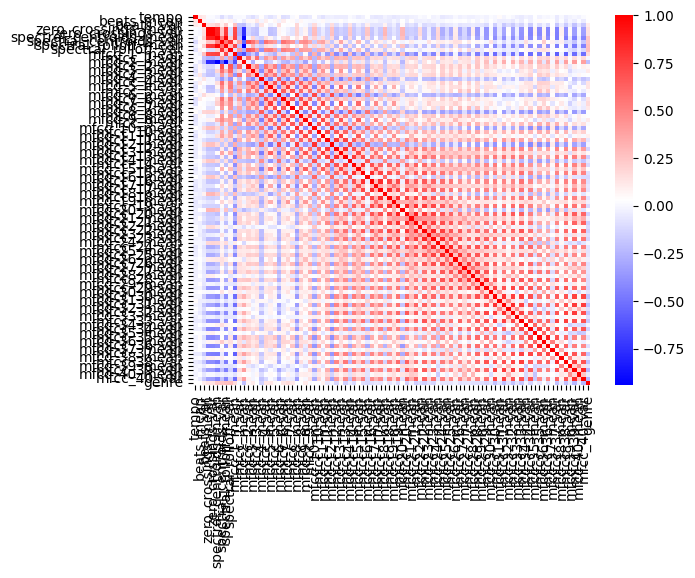

In [6]:


corr = data.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

In [7]:
corr_df = corr.stack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head()

,feature_1,feature_2,correlation
363,zero_crossings_var,zero_crossings_mean,0.997483
274,zero_crossings_mean,zero_crossings_var,0.997483
457,spectral_centroids_mean,spectral_rolloff_mean,0.979621
635,spectral_rolloff_mean,spectral_centroids_mean,0.979621
7278,mfcc_36_var,mfcc_35_var,0.894608


In [8]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

8

In [9]:

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

-324.3384334501413

In [10]:



model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

,feature,feature importance
7,spectral_rolloff_mean,2.144076
11,mfcc_2_mean,0.573162
3,zero_crossings_mean,0.396425
4,zero_crossings_var,0.338289
8,spectral_rolloff_var,0.333497
...,...,...
20,mfcc_6_var,0.000033
65,mfcc_29_mean,0.000028
76,mfcc_34_var,0.000016
64,mfcc_28_var,0.000013


In [11]:
best_feature = importance_df.feature[0:49]
best_feature

0                       tempo
1                  beats_mean
2                   beats_var
3         zero_crossings_mean
4          zero_crossings_var
5     spectral_centroids_mean
6      spectral_centroids_var
7       spectral_rolloff_mean
8        spectral_rolloff_var
9                 mfcc_1_mean
10                 mfcc_1_var
11                mfcc_2_mean
12                 mfcc_2_var
13                mfcc_3_mean
14                 mfcc_3_var
15                mfcc_4_mean
16                 mfcc_4_var
17                mfcc_5_mean
18                 mfcc_5_var
19                mfcc_6_mean
20                 mfcc_6_var
21                mfcc_7_mean
22                 mfcc_7_var
23                mfcc_8_mean
24                 mfcc_8_var
25                mfcc_9_mean
26                 mfcc_9_var
27               mfcc_10_mean
28                mfcc_10_var
29               mfcc_11_mean
30                mfcc_11_var
31               mfcc_12_mean
32                mfcc_12_var
33        

In [12]:
X = X.drop(columns=['mfcc_2_mean', 'mfcc_2_var', 'mfcc_3_mean', 'mfcc_3_var', 'mfcc_4_mean', 'mfcc_4_var','mfcc_5_mean', 'mfcc_5_var',
                    'mfcc_6_mean', 'mfcc_6_var', 'mfcc_7_mean','mfcc_7_var', 'mfcc_8_mean', 'mfcc_8_var', 'mfcc_9_mean', 
                    'mfcc_9_var', 'mfcc_10_mean', 'mfcc_10_var', 'mfcc_11_mean', 'mfcc_11_var', 'mfcc_12_mean', 'mfcc_12_var',
                    'mfcc_13_mean', 'mfcc_13_var', 'mfcc_14_mean', 'mfcc_14_var', 'mfcc_15_mean', 'mfcc_15_var', 'mfcc_16_mean',
                    'mfcc_16_var', 'mfcc_17_mean', 'mfcc_17_var', 'mfcc_18_mean', 'mfcc_18_var', 'mfcc_19_mean', 'mfcc_19_var',
                    'mfcc_20_mean', 'mfcc_20_var','mfcc_21_var', 'mfcc_22_mean', 'mfcc_22_var', 'mfcc_23_mean', 'mfcc_23_var', 'mfcc_24_mean', 
                    'mfcc_24_var', 'mfcc_25_mean', 'mfcc_25_var', 'mfcc_26_mean', 'mfcc_26_var', 'mfcc_27_mean','mfcc_27_var', 'mfcc_28_mean',
                    'mfcc_28_var','mfcc_29_mean','mfcc_29_var','mfcc_30_mean', 'mfcc_30_var','mfcc_31_mean','mfcc_31_var',
                    'mfcc_32_mean','mfcc_32_var','mfcc_33_mean','mfcc_33_var','mfcc_34_mean','mfcc_34_var','mfcc_35_mean','mfcc_35_var',
                    'mfcc_36_mean','mfcc_36_var','mfcc_37_mean','mfcc_37_var','mfcc_38_mean','mfcc_38_var','mfcc_39_mean','mfcc_39_var','mfcc_40_mean','mfcc_40_var']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

-266.42148137328394

In [13]:
simplified_model_score

-266.42148137328394